# Credit Card Fraud Classification

In [6]:
import numpy as np
import pandas as pd

from datetime import datetime, date 

In [8]:
df = pd.read_csv('../../data/fraud_credit_card.csv')

## Feature Engineering <a class="anchor" id="p1"></a>
[back to top](#top)  
Run the following code chunks in order, all only once

In [10]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [11]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [12]:
# drop unnecessary or redundant columns 
df = df.drop(columns=['Unnamed: 0', 'cc_num', 'first', 'last', 'trans_num'])

# customerID, customer name ('first', 'last'), and transaction number should not influence whether the transaction 
# was a fraud. the transaction timestamp in unix format, `unix_time`, holds the same information as 
# trans_date_trans_time, thus trans_date_trans_time is redundant. 

#### Clean merchant name column

In [14]:
# determine that 'fraud' precedes the merchant name for every record, and remove 
val = 1
for m in df.merchant:
    if m[:5] != 'fraud':
        val *= 0
print('val =', val)

df['merchant'] = df['merchant'].apply(lambda x: x[6:])

val = 1


#### Encode gender variable

In [16]:
gender_map = {'F':0, 'M':1}
df['gender'] = df['gender'].map(gender_map)
df.rename(columns={'gender': 'is_male'}, inplace=True)

In [17]:
df.head(2)

,trans_date_trans_time,merchant,category,amt,is_male,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,21/06/2020 12:14,Kirlin and Sons,personal_care,2.86,1,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,1371816865,33.986391,-81.200714,0
1,21/06/2020 12:14,Sporer-Keebler,personal_care,29.84,0,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,1371816873,39.450498,-109.960431,0


#### Create Cardholder Age Column

In [21]:
# create an age feature from 'dob' then drop 'dob'

# helper function
def age(born): 
    '''Convert DOB to age.'''
    today = date.today() 
    return today.year - born.year - ((today.month,  
                                      today.day) < (born.month,  
                                                    born.day))

dob_series = pd.to_datetime(df['dob'])
df['dob'] = dob_series
df['cardholder_age'] = df['dob'].apply(age)
df = df.drop(['dob'], axis=1)
df.head()

/var/folders/xc/86xvj1497ydff88ffk9qc2dr0000gn/T/ipykernel_49868/3660587384.py:11: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dob_series = pd.to_datetime(df['dob'])


,trans_date_trans_time,merchant,category,amt,is_male,street,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,cardholder_age
0,21/06/2020 12:14,Kirlin and Sons,personal_care,2.86,1,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0,57
1,21/06/2020 12:14,Sporer-Keebler,personal_care,29.84,0,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0,35
2,21/06/2020 12:14,"Swaniawski, Nitzsche and Welch",health_fitness,41.28,0,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0,54
3,21/06/2020 12:15,Haley Group,misc_pos,60.05,1,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0,37
4,21/06/2020 12:15,Johnston-Casper,travel,3.19,1,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0,69


#### Use Date and Time Information

In [26]:
# create distinct time and date features 
trans_datetime_series = pd.to_datetime(df['trans_date_trans_time'])
df['trans_date_trans_time'] = trans_datetime_series
df['year'] = df['trans_date_trans_time'].dt.year
df['month'] = df['trans_date_trans_time'].dt.month
df['day'] = df['trans_date_trans_time'].dt.day
df['time'] = df['trans_date_trans_time'].dt.time

df = df.drop(['trans_date_trans_time'], axis=1)

/var/folders/xc/86xvj1497ydff88ffk9qc2dr0000gn/T/ipykernel_49868/449012323.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  trans_datetime_series = pd.to_datetime(df['trans_date_trans_time'])


In [27]:
df.head(2)

,merchant,category,amt,is_male,street,city,state,zip,lat,long,...,job,unix_time,merch_lat,merch_long,is_fraud,cardholder_age,year,month,day,time
0,Kirlin and Sons,personal_care,2.86,1,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,...,Mechanical engineer,1371816865,33.986391,-81.200714,0,57,2020,6,21,12:14:00
1,Sporer-Keebler,personal_care,29.84,0,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,...,"Sales professional, IT",1371816873,39.450498,-109.960431,0,35,2020,6,21,12:14:00


In [29]:
# round time feature to hour of the day then replace

# helper function
def hour_round(dt):
    h = dt.hour
    m = dt.minute
    if m>30:
        if h==23:
            return 0
        else:
            return h+1
    return h

df['hour_of_day'] = df['time'].apply(hour_round)
df = df.drop(['time'], axis=1)

In [30]:
# all transactions occur in 2020 over the last 7 months of the year
print('Unique years:', df['year'].unique())
print('Unique months:', df['month'].unique())

Unique years: [2020]
Unique months: [ 6  7  8  9 10 11 12]


In [31]:
# drop year column
df = df.drop(['year'], axis=1)

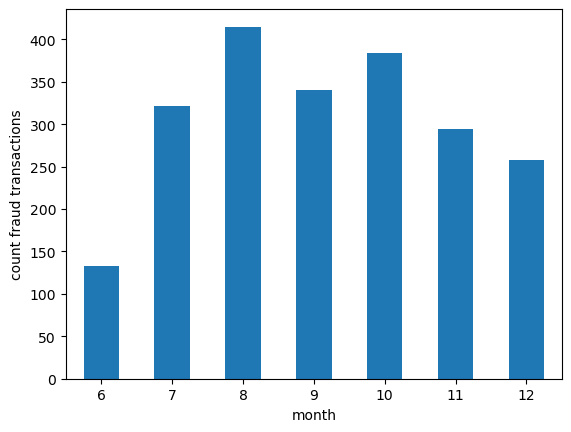

In [32]:
# observe the total number of fraudulent transactions by month
ax = df.groupby('month').is_fraud.sum().plot(kind = 'bar', rot = 0)
ax.set_xlabel('month')
ax.set_ylabel('count fraud transactions');

In [34]:
df.head(2)

,merchant,category,amt,is_male,street,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,cardholder_age,month,day,hour_of_day
0,Kirlin and Sons,personal_care,2.86,1,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0,57,6,21,12
1,Sporer-Keebler,personal_care,29.84,0,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0,35,6,21,12


#### Use Transaction Location Information

Q: Is there a correlation between the population of the state and the amount of fraudulent transactions originating there?

In [43]:
# group data by state and city
state_df_1 = pd.DataFrame(df.groupby(['state', 'city']).city_pop.mean())
state_df_1.head()

city_pop
state city                 
AK    Craig          1920.0
      Huslia          277.0
      Wales           145.0
AL    Bay Minette   19090.0
      Bessemer      71463.0

In [45]:
# find the population of each state
state_pop_df = pd.DataFrame({'state':[], 'pop':[]})
for state in df['state'].unique():
    state_pop = state_df_1.loc[state].city_pop.sum()
    info = [state, state_pop]
    state_pop_df.loc[len(state_pop_df.index)] = info

In [46]:
state_pop_df.head()

,state,pop
0,SC,506278.0
1,UT,68823.0
2,NY,6003688.0
3,FL,3593018.0
4,MI,1299880.0


In [47]:
# combine the state information into one dataframe
state_df = pd.merge(left = pd.DataFrame(df.groupby('state').is_fraud.sum()),
                    right = state_pop_df,
                    how = 'inner',
                    on = 'state')
state_df = state_df.set_index('state')
state_df.rename(columns={'is_fraud': 'tot_fraud'}, inplace=True)
state_df.head()

,tot_fraud,pop
state,,
AK,14,2342.0
AL,63,1476502.0
AR,34,90631.0
AZ,27,1334779.0
CA,76,7254731.0


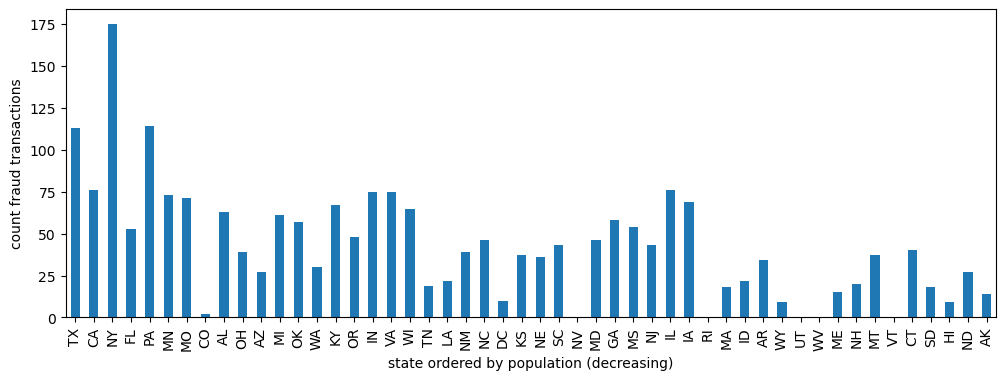

In [48]:
# plot
ax = state_df.sort_values(by='pop', ascending=False)['tot_fraud'].plot(kind='bar', rot=90, figsize=(12, 4))
ax.set_xlabel('state ordered by population (decreasing)')
ax.set_ylabel('count fraud transactions');

Observe how there is a general correlation between state population and fraudulent transactions. Therefore, this information should be included in our model. 

In [50]:
df = pd.merge(df,state_df['pop'], how='left', on='state')
df.rename(columns={'pop': 'state_pop'}, inplace=True)
df.head()

,merchant,category,amt,is_male,street,city,state,zip,lat,long,...,job,unix_time,merch_lat,merch_long,is_fraud,cardholder_age,month,day,hour_of_day,state_pop
0,Kirlin and Sons,personal_care,2.86,1,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,...,Mechanical engineer,1371816865,33.986391,-81.200714,0,57,6,21,12,506278.0
1,Sporer-Keebler,personal_care,29.84,0,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,...,"Sales professional, IT",1371816873,39.450498,-109.960431,0,35,6,21,12,68823.0
2,"Swaniawski, Nitzsche and Welch",health_fitness,41.28,0,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,...,"Librarian, public",1371816893,40.495810,-74.196111,0,54,6,21,12,6003688.0
3,Haley Group,misc_pos,60.05,1,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,...,Set designer,1371816915,28.812398,-80.883061,0,37,6,21,12,3593018.0
4,Johnston-Casper,travel,3.19,1,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,...,Furniture designer,1371816917,44.959148,-85.884734,0,69,6,21,12,1299880.0


Q: Is the city population variable correlated with fraudulent transactions? As city population increases, do we see an increase in total fraud?

In [53]:
# group data by state and city
city_df = pd.merge(left=pd.DataFrame(df.groupby(['state', 'city']).city_pop.mean()),
                      right=pd.DataFrame(df.groupby(['state', 'city']).is_fraud.sum()),
                      how = 'inner',
                      on = ['state','city'])
city_df.head()

city_pop  is_fraud
state city                           
AK    Craig          1920.0        14
      Huslia          277.0         0
      Wales           145.0         0
AL    Bay Minette   19090.0         7
      Bessemer      71463.0         8

In [54]:
# verify above result is accurate
df[df['state']=='WY'].groupby('city').is_fraud.sum()

city
Alva                         0
Fort Washakie                0
Freedom                      0
Jelm                         0
Lagrange                     0
Laramie                      2
Lonetree                     0
Manville                     7
Riverton                     0
Rock Springs                 0
Yellowstone National Park    0
Name: is_fraud, dtype: int64

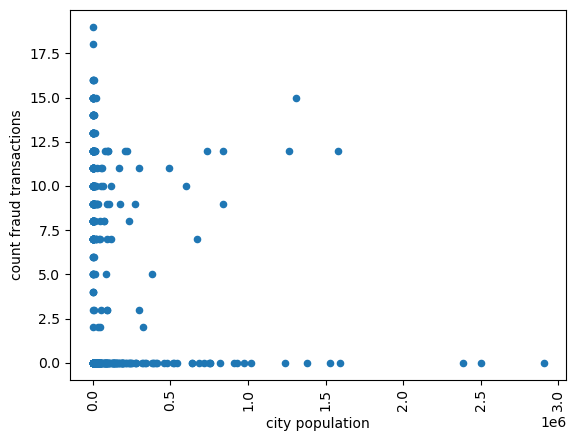

In [55]:
# plot
ax = city_df.plot.scatter(x='city_pop', y='is_fraud', rot=90)
ax.set_xlabel('city population')
ax.set_ylabel('count fraud transactions');

We can observe above that there is not necessarily a correlation between the population of a city and fraudulent transactions. 

In [57]:
# can verify that 7 of the 10 biggest cities had no fraud
city_df.sort_values(by='city_pop', ascending=False).iloc[:10]

,,city_pop,is_fraud
state,city,,
TX,Houston,2906700.0,0
NY,Brooklyn,2504700.0,0
CA,Los Angeles,2383912.0,0
TX,San Antonio,1595797.0,0
NY,New York City,1577385.0,12
PA,Philadelphia,1526206.0,0
NY,Bronx,1382480.0,0
AZ,Phoenix,1312922.0,15
TX,Dallas,1263321.0,12


In [58]:
# can verify that 10 cities with the most fraud do not have large populations
city_df.sort_values(by='is_fraud', ascending=False).iloc[:10]

,,city_pop,is_fraud
state,city,,
KS,Burrton,1689.0,19
PA,Clarks Mills,606.0,18
ND,Reynolds,733.0,16
FL,Jay,5719.0,16
NY,Chatham,4015.0,16
SC,Bradley,1523.0,16
AZ,Phoenix,1312922.0,15
CT,Plymouth,2376.0,15
NJ,Heislerville,526.0,15


In [59]:
# drop street, city, state, zip information for now
# we could use the lat and long information instead of these
    # in the future could link this data to another dataset with average income of residents in each (city,state) pair
        # could combine cardholders city and state information in future work
            # df['cardholder_loc'] = df['city'] + ' ' + df['state']
            # # notice that some cities are located in different states and have the same name
            # print('distinct city,state locations: ', df['cardholder_loc'].unique().size)
            # print('distinct cities: ', df['city'].unique().size)
            # print('thus combining the city and state features in this way was justified')
    # we do still have some information about the transaction location though: city population

df = df.drop(['street', 'city', 'state', 'zip'], axis=1)

In [61]:
# add a euclidean distance column 
# difference in latitude between cardholder and merchant
df['lat_diff'] = np.abs(df['lat'] - df['merch_lat'])

# difference in logitude between cardholder and merchant
df['long_diff'] = np.abs(df['long'] - df['merch_long'])

# compute the manhattan distance between cardholder and merchant
df['dist'] = np.sqrt(df['lat_diff']**2 + df['long_diff']**2)


# remove the lat and long differnece variables 
df = df.drop(['lat_diff', 'long_diff'], axis=1)

In [62]:
df.head(2)

,merchant,category,amt,is_male,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,cardholder_age,month,day,hour_of_day,state_pop,dist
0,Kirlin and Sons,personal_care,2.86,1,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0,57,6,21,12,506278.0,0.266004
1,Sporer-Keebler,personal_care,29.84,0,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0,35,6,21,12,68823.0,0.991674


#### Merchant Feature Engineering

In [66]:
# Find how many of the transactions that occured at the merchants were fraudulent transactions and print the top five.

merch_df = pd.DataFrame({'merchant':df.groupby('merchant').is_fraud.sum().index,
                         'num_fraud_transactions':df.groupby('merchant').is_fraud.sum().values,
                         'num_total_transactions':df.groupby('merchant').is_fraud.count().values},
                       )

In [68]:
merch_df.head()

,merchant,num_fraud_transactions,num_total_transactions
0,Abbott-Rogahn,1,803
1,Abbott-Steuber,2,766
2,Abernathy and Sons,0,762
3,Abshire PLC,0,838
4,"Adams, Kovacek and Kuhlman",1,414


In [69]:
merch_df['fraud_raw_prob'] = (merch_df['num_fraud_transactions'] / merch_df['num_total_transactions'])
merch_df.sort_values(by='fraud_raw_prob', ascending=False).head()

,merchant,num_fraud_transactions,num_total_transactions,fraud_raw_prob
528,"Romaguera, Cruickshank and Greenholt",18,828,0.021739
386,Lemke-Gutmann,18,837,0.021505
443,"Mosciski, Ziemann and Farrell",18,870,0.020690
238,"Heathcote, Yost and Kertzmann",17,830,0.020482
523,"Rodriguez, Yost and Jenkins",10,501,0.019960


In [74]:
# add more columns
merch_df['merch_lat'] = df.groupby('merchant').merch_lat.mean().values
merch_df['merch_long'] = df.groupby('merchant').merch_long.mean().values
merch_df['avg_amt'] = df.groupby('merchant').amt.mean().values
merch_df['tot_amt'] = df.groupby('merchant').amt.sum().values
merch_df['male_customer_avg'] = df.groupby('merchant').is_male.mean().values

# set index to merchant name
merch_df = merch_df.set_index('merchant')
merch_df.head()

,num_fraud_transactions,num_total_transactions,fraud_raw_prob,merch_lat,merch_long,avg_amt,tot_amt,male_customer_avg
merchant,,,,,,,,
Abbott-Rogahn,1,803,0.001245,38.671303,-90.644001,66.198369,53157.29,0.474471
Abbott-Steuber,2,766,0.002611,38.327988,-89.925832,51.221958,39236.02,0.408616
Abernathy and Sons,0,762,0.000000,38.459248,-90.215522,50.650630,38595.78,0.442257
Abshire PLC,0,838,0.000000,38.591720,-90.183716,62.932876,52737.75,0.494033
"Adams, Kovacek and Kuhlman",1,414,0.002415,38.831748,-90.206514,54.640507,22621.17,0.403382


#### Find merchant clusters

In [80]:
# feature scaling
# this is important because K-means uses euclidean distance 
from sklearn.preprocessing import StandardScaler

In [81]:
# standardization
s_scaler = StandardScaler()
s_scaled = s_scaler.fit_transform(merch_df)
s_scaled_df = pd.DataFrame(s_scaled, columns=merch_df.columns)

In [82]:
s_scaled_df.head(2)

,num_fraud_transactions,num_total_transactions,fraud_raw_prob,merch_lat,merch_long,avg_amt,tot_amt,male_customer_avg
0,-0.581479,0.004468,-0.604492,0.579569,-0.813110,-0.166877,-0.100038,0.642687
1,-0.303955,-0.146276,-0.280780,-0.825588,0.564054,-0.837672,-0.659556,-1.301741


In [83]:
# decide on a number of clusters to make
# cluster inertia within-cluster sum of squares mean

from sklearn.cluster import KMeans

wcss = [] 
for i in range(1,11):
    model = KMeans(n_clusters=i, random_state=2001)
    y_kmeans = model.fit_predict(s_scaled_df)
    wcss.append(model.inertia_)  # record inter-cluster inertia

In [84]:
import matplotlib.pyplot as plt

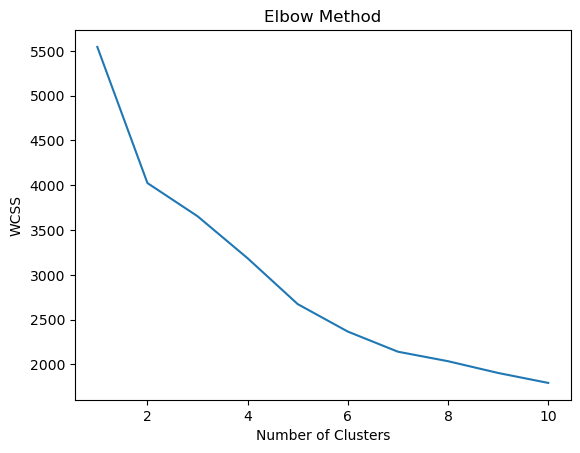

In [85]:
plt.plot(range(1,11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

From the above method - will choose to make 5 merchant clusters.

In [92]:
# assign clusters to merchants
model = KMeans(n_clusters=5, random_state=2001)
y_kmeans = model.fit_predict(s_scaled_df)
merch_df['merch_cluster'] = y_kmeans
merch_df.head()

,num_fraud_transactions,num_total_transactions,fraud_raw_prob,merch_lat,merch_long,avg_amt,tot_amt,male_customer_avg,merch_cluster
merchant,,,,,,,,,
Abbott-Rogahn,1,803,0.001245,38.671303,-90.644001,66.198369,53157.29,0.474471,0
Abbott-Steuber,2,766,0.002611,38.327988,-89.925832,51.221958,39236.02,0.408616,3
Abernathy and Sons,0,762,0.000000,38.459248,-90.215522,50.650630,38595.78,0.442257,3
Abshire PLC,0,838,0.000000,38.591720,-90.183716,62.932876,52737.75,0.494033,0
"Adams, Kovacek and Kuhlman",1,414,0.002415,38.831748,-90.206514,54.640507,22621.17,0.403382,3


In [99]:
# add new information to the larger df
df = pd.merge(df, merch_df[['fraud_raw_prob','merch_cluster']], how='left', on='merchant')
# remove merchant name
df = df.drop(['merchant'], axis=1)

In [101]:
df.head(5)

,category,amt,is_male,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,cardholder_age,month,day,hour_of_day,state_pop,dist,fraud_raw_prob,merch_cluster
0,personal_care,2.86,1,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0,57,6,21,12,506278.0,0.266004,0.004076,3
1,personal_care,29.84,0,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0,35,6,21,12,68823.0,0.991674,0.001274,3
2,health_fitness,41.28,0,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0,54,6,21,12,6003688.0,0.682970,0.001325,0
3,misc_pos,60.05,1,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0,37,6,21,12,3593018.0,0.250985,0.004219,3
4,travel,3.19,1,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0,69,6,21,12,1299880.0,1.118816,0.002703,4


#### Future Work: Use Job Information
- create job clusters since too many unique jobs for OHE 

In [120]:
# for now drop job
df = df.drop(['job'], axis=1)

#### Product Category One Hot Encoding

In [125]:
print('list of unique product categories: ')
print(list(df.category.unique()))
print()
print(len(list(df.category.unique())), 'unique product categories')

list of unique product categories: 
['personal_care', 'health_fitness', 'misc_pos', 'travel', 'kids_pets', 'shopping_pos', 'food_dining', 'home', 'entertainment', 'shopping_net', 'misc_net', 'grocery_pos', 'gas_transport', 'grocery_net']

14 unique product categories


In [127]:
# oneHot encode the product category feature
df = pd.get_dummies(df, columns=['category'], dtype=int)

In [128]:
df.head()

,amt,is_male,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,cardholder_age,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,1,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0,57,...,0,0,0,0,0,0,1,0,0,0
1,29.84,0,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0,35,...,0,0,0,0,0,0,1,0,0,0
2,41.28,0,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0,54,...,0,1,0,0,0,0,0,0,0,0
3,60.05,1,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0,37,...,0,0,0,0,0,1,0,0,0,0
4,3.19,1,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0,69,...,0,0,0,0,0,0,0,0,0,1


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   amt                      555719 non-null  float64
 1   is_male                  555719 non-null  int64  
 2   lat                      555719 non-null  float64
 3   long                     555719 non-null  float64
 4   city_pop                 555719 non-null  int64  
 5   unix_time                555719 non-null  int64  
 6   merch_lat                555719 non-null  float64
 7   merch_long               555719 non-null  float64
 8   is_fraud                 555719 non-null  int64  
 9   cardholder_age           555719 non-null  int64  
 10  month                    555719 non-null  int32  
 11  day                      555719 non-null  int32  
 12  hour_of_day              555719 non-null  int64  
 13  state_pop                555719 non-null  float64
 14  dist

## Modeling

In [149]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score

In [139]:
y = df['is_fraud']
X = df.drop(['is_fraud'], axis=1)

In [141]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2001)
print( f"shape of X_train, y_train, X_test, y_test: {X_train.shape}, {y_train.shape},{X_test.shape},{y_test.shape}")

shape of X_train, y_train, X_test, y_test: (389003, 30), (389003,),(166716, 30),(166716,)


In [155]:
# check the rate of fraud
sum(y_train)/len(y_train)

0.0038508700447040254

In [181]:
# if you predicted NOT fraud for every transaction your accuracy would be ...
y_train[y_train==0].size / y_train.size

0.9961491299552959

In [183]:
# therefore we need a model to be more accurate than ...
y_train[y_train==0].size / y_train.size

0.9961491299552959

### Decision Tree

In [273]:
# Create a Decision Tree using entropy as attribute selection
DT_clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [275]:
# Training the tree
DT_clf = DT_clf.fit(X_train, y_train)

In [298]:
# class probabilities
probabs = (DT_clf.predict_proba(X_test))

In [308]:
# generate predictions
y_pred = (probabs[:,1] >= 0.01).astype(bool)

In [302]:
# more accurate than always predicting NOT fraud?
print('Decision Tree Accuracy:', sum(y_pred == y_test)/len(y_pred))
(sum(y_pred == y_test)/len(y_pred)) > (y_train[y_train==0].size / y_train.size)

Decision Tree Accuracy: 0.9979186160896375


True

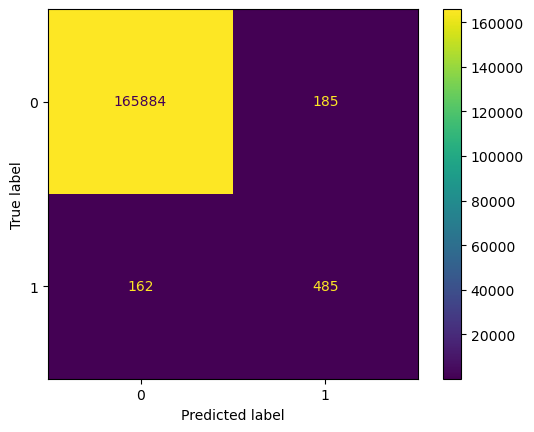

In [304]:
c_mat = confusion_matrix(y_test, y_pred, labels=DT_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=c_mat, display_labels=DT_clf.classes_)
disp.plot();

In [306]:
F1_score = f1_score(y_test, y_pred)
precision = c_mat[0,0] / (c_mat[0,0]+c_mat[1,0])
recall = c_mat[0,0] / (c_mat[0,0]+c_mat[0,1])

print('DT F1 Score:', F1_score)
print('DT Precision:', precision)
print('DT Recall:', recall)

DT F1 Score: 0.7365223993925588
DT Precision: 0.9990243667417462
DT Recall: 0.9988860052147


### Logistic Regression

In [207]:
# Creating and training the model
LR_clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [285]:
# class probabilities
probabs = (LR_clf.predict_proba(X_test))

In [237]:
# choosing an optimal threshold

In [239]:
import matplotlib.pyplot as plt
import numpy as np

In [231]:
t_list = np.linspace(0.1, 0.005, 100)
f1_list = []

for threshold in t_list:
    y_pred = (probabs[:,1] >= threshold).astype(bool)
    f1_list.append(f1_score(y_test, y_pred))

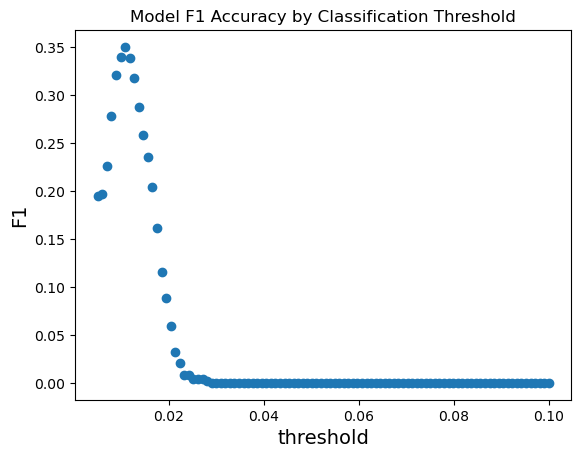

In [296]:
plt.title('Model F1 Accuracy by Classification Threshold')
plt.xlabel('threshold', size = 14)
plt.ylabel('F1', size = 14)
plt.scatter(t_list,f1_list);

In [247]:
# Find the threshold corresponding to the largest F1 score
max_value = max(f1_list)
max_index = f1_list.index(max_value)
print('Optimal Threshold:', t_list[max_index])

Optimal Threshold: 0.010757575757575757


In [287]:
# generate predictions
y_pred = (probabs[:,1] >= 0.010757).astype(bool)

In [289]:
# more accurate than always predicting NOT fraud?
print('Logistic Reg. Accuracy:', sum(y_pred == y_test)/len(y_pred))
(sum(y_pred == y_test)/len(y_pred)) > (y_train[y_train==0].size / y_train.size)

Logistic Reg. Accuracy: 0.9938218287386933


False

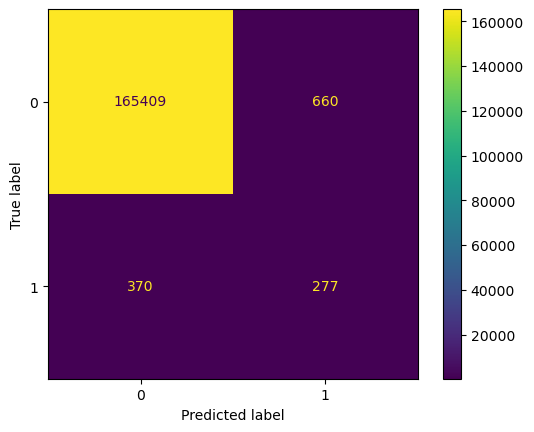

In [263]:
c_mat = confusion_matrix(y_test, y_pred, labels=LR_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=c_mat, display_labels=LR_clf.classes_)
disp.plot();

In [265]:
F1_score = f1_score(y_test, y_pred)
precision = c_mat[0,0] / (c_mat[0,0]+c_mat[1,0])
recall = c_mat[0,0] / (c_mat[0,0]+c_mat[0,1])

print('LR F1 Score:', F1_score)
print('LR Precision:', precision)
print('LR Recall:', recall)

LR F1 Score: 0.34974747474747475
LR Precision: 0.9977681129696765
LR Recall: 0.996025748333524


### Comparison
In the context of predicting credit fraud, the most important metric to consider is F1 Score. We want our model to have high sensitivity, because we want to make sure we catch any fraudulent behavior as it can result in losses of cardholders. However, we are also interested in a high specificity, or a small number of false positives. This is because it can be a real detriment to a cardholder to not be able to use their card if they need it in some situation, i.e. by classifying a non-fraudulent transaction as fraudulent, the cardholder might be denied access to their funds for no good reason. F1-score takes both of these into account. Therefore, in this context, the Decision Tree model performs the best. 

### Future Work
Figure out how to boost the accuracy of the Logistic Regression model. 
- check for collinearity in the predictor variables
- apply standardization to the training data
- try other models as seen below

#### KNN

In [448]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [449]:
predictions = neigh.predict(X_test)

In [450]:
#print(predictions)
acc = np.sum(predictions == y_test) / len(y_test)
print('KNN accuracy:', acc)

KNN accuracy: 0.996305093692267


In [451]:
c_mat = confusion_matrix(y_test, predictions)
c_mat

array([[165729,    340],
       [   276,    371]])

In [452]:
F1_score = f1_score(y_test, predictions)
precision = c_mat[0,0] / (c_mat[0,0]+c_mat[1,0])
recall = c_mat[0,0] / (c_mat[0,0]+c_mat[0,1])

print('KNN F1 Score:', F1_score)
print('KNN Precision:', precision)
print('KNN Recall:', recall)

KNN F1 Score: 0.5463917525773195
KNN Precision: 0.9983373994759194
KNN Recall: 0.9979526582324214


#### SVM

In [136]:
svm_clf = svm.SVC(kernel='linear').fit(X_train,y_train)

In [137]:
predictions = svm_clf.predict(X_test)

In [138]:
acc = np.sum(predictions == y_test) / len(y_test)
print('SVM accuracy:', acc)

SVM accuracy: 0.9946666666666667


In [139]:
c_mat = confusion_matrix(y_test, predictions)
c_mat

array([[2984,   10],
       [   6,    0]])

In [141]:
F1_score = f1_score(y_test, predictions)
precision = c_mat[0,0] / (c_mat[0,0]+c_mat[1,0])
recall = c_mat[0,0] / (c_mat[0,0]+c_mat[0,1])

print('SVM F1 Score:', F1_score)
print('SVM Precision:', precision)
print('SVM Recall:', recall)

SVM F1 Score: 0.0
SVM Precision: 0.9979933110367893
SVM Recall: 0.9966599866399466


#### Adaptive Boosting

In [ ]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

# Train Adaboost Classifer
model1 = abc.fit(X_train, y_train)


#Predict the response for test dataset
y_pred = model1.predict(X_test)